In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# Dades de la velocitat de connexió a internet
dades = pd.read_csv('Velocitat_de_connexi__a_internet_mesurada_a_trav_s_de_l_aplicaci__ConfinApp_segons_la_comarca.csv')
dades.head()

,data,nom_comarca,nom_vegueria,total_tests_realitzats,velocitat_mitjana
0,02/04/2020,Baix Llobregat,Barcelona,18,52.377333
1,02/04/2020,Vallès Occidental,Barcelona,6,31.835000
2,02/04/2020,Barcelonès,Barcelona ciutat,2,136.748001
3,02/04/2020,Garraf,Penedès,4,53.464002
4,02/04/2020,Montsià,Terres de l'Ebre,2,64.674004


In [3]:
# Càlcul de la mitjana de velocitat
dades['mitjana_n'] = dades['velocitat_mitjana'] * dades['total_tests_realitzats']
dades_comarca = dades.groupby('nom_comarca').sum()
velocitat_comarca = pd.DataFrame(dades_comarca['mitjana_n'] / dades_comarca['total_tests_realitzats'],
                                 columns=['mitjana_mbps'])

In [4]:
# Correcció nom Vall d'Aran a l'índex
velocitat_comarca = velocitat_comarca.rename(index={'Vall d\'Aran':'Val d\'Aran'})

In [5]:
# Dades de les comarques
comarques = gpd.read_file('../Dades/ComarquesCatalunya/bm5mv21sh0tpc1_20200601_0.shp')
comarques.head()

,CODICOMAR,NOMCOMAR,AREACOMAR,DATAALTA,geometry
0,01,Alt Camp,537.6271,202006011200,"POLYGON ((373460.675 4592274.863, 373469.964 4..."
1,02,Alt Empordà,1356.8921,202006011200,"MULTIPOLYGON (((518430.950 4676094.330, 518429..."
2,03,Alt Penedès,592.5328,202001011200,"POLYGON ((384583.666 4596586.413, 384601.846 4..."
3,04,Alt Urgell,1447.2028,202001011200,"MULTIPOLYGON (((360797.200 4650206.600, 360960..."
4,05,Alta Ribagorça,427.2234,202001011200,"POLYGON ((326129.023 4722063.745, 326142.120 4..."


In [6]:
# Unió de les dades
mapa_velocitat = comarques.merge(velocitat_comarca, left_on='NOMCOMAR', right_on='nom_comarca')

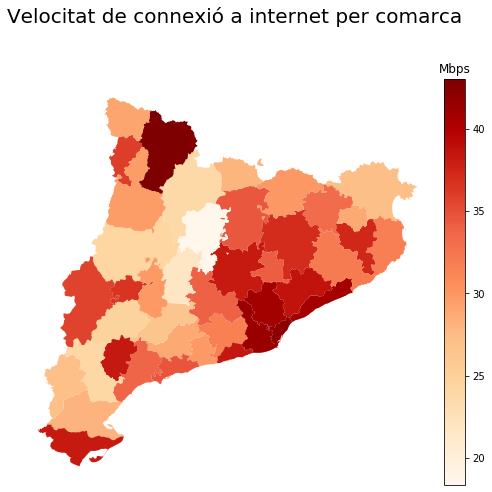

In [7]:
# Creació del mapa
fig, ax = plt.subplots(figsize=(8,8))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

mapa_velocitat.plot(column='mitjana_mbps', cmap='OrRd',ax=ax, legend=True, cax=cax)
fig.suptitle('Velocitat de connexió a internet per comarca', fontsize=20)
plt.title("Mbps")
ax.set_axis_off()
plt.savefig('mapa_mbps_comarca.png')
plt.show()

**Fonts de dades**

* Dades de la velocitat de connexió a internet: Dades Obertes Catalunya
(https://analisi.transparenciacatalunya.cat/Sector-P-blic/Velocitat-de-connexi-a-internet-mesurada-a-trav-s-/r4mn-xv6q)

* Dades geogràfiques de les comarques: Institut Cartogràfic i Geològic de Catalunya
(https://www.icgc.cat/Administracio-i-empresa/Descarregues/Capes-de-geoinformacio/Base-municipal)